<a href="https://colab.research.google.com/github/sandeepshrigondekar/TrafficLightDetection/blob/main/TLDv1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This cell imports the drive library and mounts your Google Drive as a VM local drive. You can access to your Drive files 
# using this path "/content/gdrive/My Drive/"
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [ ]:
# List the content of your local computer folder 
!ls -la "/content/gdrive/My Drive/"

total 151274
-rw------- 1 root root    226539 Jun  9  2014 '100008253362 (1).pdf'
-rw------- 1 root root    237990 Jul 19  2014  100008253362.pdf
-rw------- 1 root root      6918 Aug 24  2014  210814EC02008317.pdf
-rw------- 1 root root    265568 Nov 19 17:53  Automation.pptx
drwx------ 2 root root      4096 Jan  2 12:46  Bosch_Dataset
-rw------- 1 root root     91081 Oct 11  2014  CAS_31082014_32371670.pdf
drwx------ 2 root root      4096 Jan 27  2020 'Colab Notebooks'
-rw------- 1 root root 150828752 Jun 21  2020  creditcard.csv
-rw------- 1 root root   3177781 Jul 14 05:51  Docs.zip
-rw------- 1 root root     18723 Sep  6  2014 'ELITE I20.XLS'
-rw------- 1 root root       151 Mar  7  2010 'General Information all tours[1].gdoc'
-rw------- 1 root root     19670 Dec 15 03:46  GYM-Data.xlsx
drwx------ 2 root root      4096 Jul 28  2019  IITB-DS-ML
drwx------ 2 root root      4096 Jan  2 12:46  .ipynb_checkpoints
drwx------ 2 root root      4096 Sep  1 22:56  LJMU-MS
drwx------ 2 root r

In [ ]:
# CUDA: Let's check that Nvidia CUDA is already pre-installed and which version is it. In some time from now maybe you 
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


In [ ]:
!git clone https://github.com/pjreddie/darknet
%cd darknet
!make

fatal: destination path 'darknet' already exists and is not an empty directory.
/content/darknet
make: Nothing to be done for 'all'.


In [ ]:
# !wget https://pjreddie.com/media/files/yolov3.weights

In [ ]:
#Makes a dir for darknet
%cd /content/gdrive/My\ Drive/TLD
%mkdir darknet

/content/gdrive/My Drive/TLD
mkdir: cannot create directory ‘darknet’: File exists


In [ ]:
#Copy the Darknet compiled version to Google drive
!cp -r /content/darknet /content/gdrive/My\ Drive/TLD/

In [ ]:
%cd /content/gdrive/My\ Drive/TLD/darknet/
# !cp /content/gdrive/My\ Drive/TLD/darknet/ ./darknet

# Set execution permissions to Darknet
!chmod +x ./darknet

/content/gdrive/My Drive/TLD/darknet


In [ ]:
## Some Utils
# These utils are:
# * imgShow() - Will help us to show an image in the remote VM
# * download() - Will allow you to get some file from your notebook in case you need to
# * upload() - You can upload files to your current folder on the remote VM.
#download files
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  #plt.rcParams['figure.figsize'] = [10, 5]
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()
  
  
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)
def download(path):
  from google.colab import files
  files.download(path)

layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

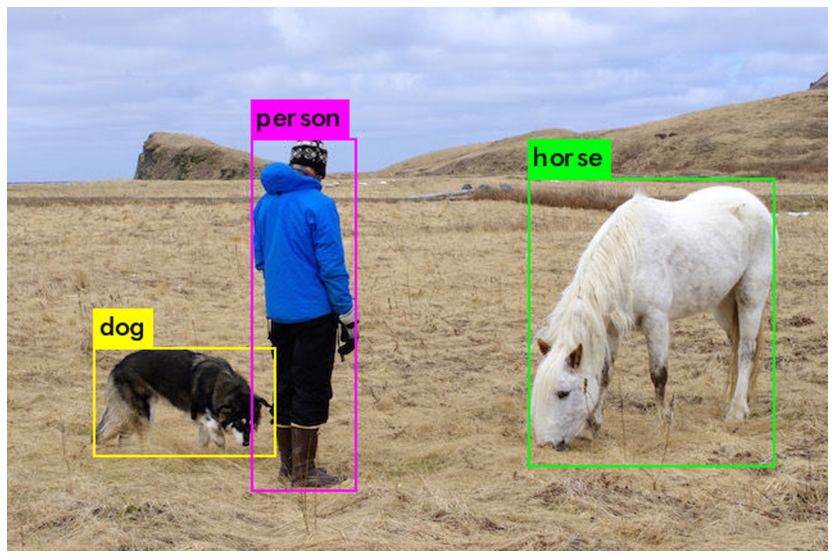

In [ ]:
# Execute darknet using YOLOv3 model with pre-trained weights to detect objects on 'person.jpg'
!./darknet detect cfg/yolov3.cfg yolov3.weights data/person.jpg
# Show the result using the helper imgShow()
imShow('predictions.jpg')

In [ ]:
#Start of TLD

In [ ]:
!git clone git@github.com:bosch-ros-pkg/bstld.git

fatal: destination path 'bstld' already exists and is not an empty directory.


In [ ]:
!git clone https://github.com/bosch-ros-pkg/bstld.git

fatal: destination path 'bstld' already exists and is not an empty directory.


In [ ]:
#%cd /content/gdrive/MyDrive/Bosch_Dataset/dataset_train_rgb

In [ ]:
#pwd

In [ ]:
#%mkdir traffic_light_images_train

In [ ]:
#%cd /content/gdrive/MyDrive/Bosch_Dataset/dataset_test_rgb

In [ ]:
#pwd

In [ ]:
#%mkdir traffic_light_images_test

In [ ]:
#!find /content/gdrive/MyDrive/Bosch_Dataset/dataset_train_rgb/rgb/train/ -type f -print0 | xargs -0 --no-run-if-empty cp --target-directory=/content/gdrive/MyDrive/Bosch_Dataset/dataset_train_rgb/traffic_light_images_train/

In [ ]:
#!find /content/gdrive/MyDrive/Bosch_Dataset/dataset_test_rgb/rgb/test/ -type f -print0 | xargs -0 --no-run-if-empty cp --target-directory=/content/gdrive/MyDrive/Bosch_Dataset/dataset_test_rgb/traffic_light_images_test/

In [ ]:
#%cd traffic_light_images_train 

In [ ]:
#!ls | wc -l

In [ ]:
#%cd /content/gdrive/MyDrive/Bosch_Dataset/dataset_test_rgb/traffic_light_images_test

In [ ]:
#!ls | wc -l

In [ ]:
#%cd /content/gdrive/MyDrive/Bosch_Dataset/dataset_train_rgb
#%mkdir traffic_light_xmls_train

In [ ]:
# %cd /content/gdrive/MyDrive/Bosch_Dataset/dataset_train_rgb
# %mkdir traffic_light_labels_train

In [ ]:
#%cd /content/gdrive/MyDrive/Bosch_Dataset/dataset_test_rgb/
#%mkdir traffic_light_xmls_test

In [ ]:
%cd /content/gdrive/MyDrive/TLD/darknet/bstld

/content/gdrive/MyDrive/TLD/darknet/bstld


In [ ]:
#create necessary xml files for training with YOLO. Where first argument is PATH_TO_DATASET/train.yaml and second argument is /train/traffic_light_xmls folder which we recently created
#!python bosch_to_pascal.py /content/gdrive/MyDrive/Bosch_Dataset/dataset_train_rgb/train.yaml /content/gdrive/MyDrive/Bosch_Dataset/dataset_train_rgb/traffic_light_xmls_train

In [ ]:
 #%cd /content/gdrive/MyDrive/Bosch_Dataset/dataset_train_rgb/traffic_light_xmls_train
 #!ls | wc -l

In [ ]:
#Now we have 5093 xml label files but we have to convert VOC to YOLO type labels with the script from darknet. So create a traffic_light_labels folder for train
#%mkdir traffic_light_labels_train

In [ ]:
#go back to the darknet folder and create a folder named traffic-lights. We will put our files in this folder to reach them easily
#%cd /content/darknet/

In [ ]:
%cd /content/gdrive/MyDrive/TLD/
%mkdir traffic-lights 
%cd traffic-lights

/content/gdrive/MyDrive/TLD
mkdir: cannot create directory ‘traffic-lights’: File exists
/content/gdrive/My Drive/TLD/traffic-lights


In [ ]:
# !cp /content/gdrive/MyDrive/TLD/darknet/cfg/voc.data /content/gdrive/MyDrive/TLD/traffic-lights/voc-bosch.data

In [ ]:
# !cp  /content/gdrive/MyDrive/TLD/darknet/data/voc.names /content/gdrive/MyDrive/TLD/traffic-lights/voc-bosch.names

In [ ]:
%cd /content/gdrive/MyDrive/TLD/traffic-lights

/content/gdrive/MyDrive/TLD/traffic-lights


In [ ]:
# Get paths of the .xml files as a list in a .txt file, execute below Python script and pass the xmls as input argument
!python /content/gdrive/MyDrive/TLD/traffic-lights/make_xml_list.py /content/gdrive/MyDrive/Bosch_Dataset/dataset_train_rgb/traffic_light_xmls_train

Length of the .xml xml_files:  5093


In [ ]:
# Get paths of the .png(images) files as a list in a .txt file, execute below Python script and pass the imgs path as input argument
!python /content/gdrive/MyDrive/TLD/traffic-lights/make_img_list.py /content/gdrive/MyDrive/Bosch_Dataset/dataset_train_rgb/traffic_light_images_train

Length of the .png img_files:  5093


In [ ]:
#Create a backup folder inside traffic-lights folder where we will save our weights as we train
%mkdir backup

mkdir: cannot create directory ‘backup’: File exists


In [ ]:
%cd /content/gdrive/MyDrive/Bosch_Dataset/dataset_train_rgb/traffic_light_labels_train

/content/gdrive/MyDrive/Bosch_Dataset/dataset_train_rgb/traffic_light_labels_train


In [ ]:
#create train.txt and test.txt which are list of the paths' of the relative images.Below script takes recently created traffic_lights.txt file as first argument and second argument split percentage between 0 to 1.
!python /content/gdrive/MyDrive/TLD/traffic-lights/train_test_split.py  /content/gdrive/MyDrive/TLD/traffic-lights/traffic_lights.txt 0.2

In [ ]:
# !cp /content/gdrive/MyDrive/TLD/darknet/scripts/voc_label.py /content/gdrive/MyDrive/TLD/traffic-lights/bosch_voc_to_yolo_converter.py

In [ ]:
!python /content/gdrive/MyDrive/TLD/traffic-lights/bosch_voc_to_yolo_converter.py /content/gdrive/MyDrive/Bosch_Dataset/dataset_train_rgb/traffic_light_labels_train/ /content/gdrive/MyDrive/TLD/traffic-lights/bosch_traffic_light_xmls_list.txt /content/gdrive/MyDrive/Bosch_Dataset/dataset_train_rgb/traffic_light_images_train

In [ ]:
#copy yolov3-tiny.cfg into traffic-lights folder and name it yolov3-tiny-bosch.cfg 
# !cp /content/gdrive/MyDrive/TLD/darknet/cfg/yolov3-tiny.cfg /content/gdrive/MyDrive/TLD/traffic-lights/yolov3-tiny-bosch.cfg

In [ ]:
# Open the yolov3-tiny-bosch.cfg file and uncomment lines 5,6,7 
# Calculate filters= 3 x (5 + #ofclasses). In this case filters = 3 x (5+8) = 39
# Change filters' size before '[yolo]' parameters (lines 127 and 171) with 39  
# Change classes to 8 in '[yolo]' parameters (lines 135 and 177).
# Now using Transfer Learning we use the pre-trained VOC data and just change the end of the deep-neural-network

In [ ]:
%cd /content/gdrive/My\ Drive/TLD/darknet/
# !cp /content/gdrive/My\ Drive/TLD/darknet/ ./darknet

# Set execution permissions to Darknet
!chmod +x ./darknet

/content/gdrive/My Drive/TLD/darknet


In [ ]:
#start to train
! ./darknet detector train /content/gdrive/MyDrive/TLD/traffic-lights/voc-bosch.data /content/gdrive/MyDrive/TLD/traffic-lights/yolov3-tiny-bosch.cfg /content/gdrive/MyDrive/TLD/darknet/darknet53.conv.74

Streaming output truncated to the last 5000 lines.
784: 0.004030, 4.144666 avg, 0.000378 rate, 1.491493 seconds, 784 images
Loaded: 0.000050 seconds
Region 16 Avg IOU: -nan, Class: -nan, Obj: -nan, No Obj: 0.000626, .5R: -nan, .75R: -nan,  count: 0
Region 23 Avg IOU: 0.018457, Class: 0.427605, Obj: 0.013944, No Obj: 0.000608, .5R: 0.000000, .75R: 0.000000,  count: 3
785: 4.817301, 4.211930 avg, 0.000380 rate, 1.476195 seconds, 785 images
Loaded: 0.000053 seconds
Region 16 Avg IOU: -nan, Class: -nan, Obj: -nan, No Obj: 0.000621, .5R: -nan, .75R: -nan,  count: 0
Region 23 Avg IOU: 0.051941, Class: 0.219343, Obj: 0.011529, No Obj: 0.000652, .5R: 0.000000, .75R: 0.000000,  count: 3
786: 6.830036, 4.473741 avg, 0.000382 rate, 1.492211 seconds, 786 images
Loaded: 0.000074 seconds
Region 16 Avg IOU: -nan, Class: -nan, Obj: -nan, No Obj: 0.000616, .5R: -nan, .75R: -nan,  count: 0
Region 23 Avg IOU: 0.032116, Class: 0.413129, Obj: 0.009151, No Obj: 0.000633, .5R: 0.000000, .75R: 0.000000,  coun